# Housing prices -- feed-forward neural network
This notebook explores using feed-forward neural networks to predict housing prices from the full dataset.

## Setup

In [6]:
%pwd
%cd /Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques/
%pwd

/Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques


'/Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques'

In [7]:
# Setup environment and import standard modules
import sys
import os
import datetime
import numpy as np
import pandas as pd

# Import numerical libraries
import sklearn as skl
from sklearn import linear_model, metrics
import tensorflow as tf
from tensorflow import keras
print('Tensorflow version: {}'.format(tf.__version__))

# Set up plotting (inline)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import custom modules
#sys.path.append(os.path.join(os.getcwd(), 'modules'))
#import plottools as pt
import housing

# Autoreload (see https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html)
%load_ext autoreload
%autoreload

Tensorflow version: 2.0.0


## Train a model using the entire dataset

The previous notebook focused on using a subset of features that seemed to be informative.  This did reasonably well, but we should see if we can make use of all of the available information.

In [8]:
# Load data
df_train, df_test = housing.load_proc_datasets()

/Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques/housing.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_merged['GarageYrBlt'][mask] = df_merged['YearBuilt'][mask]
/Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques/housing.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  value[value.isna()] = default_vals[key]
Series([], dtype: int64)
/Users/alandegenhart/Documents/GitHub/python/kaggle/house-prices-advanced-regression-techniques/housing.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [172]:
# Remove id and sale price data
train_id = df_train.pop('Id')
train_sale_price = df_train.pop('SalePrice')
test_id = df_test.pop('Id')

In [115]:
print(df_train.keys())
print(df_test.keys())

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_Normal', 'SaleCondition_Alloca',
       'SaleCondition_Partial', 'SaleCondition_AdjLand', 'MiscFeature_Othr',
       'MiscFeature_NONE', 'MiscFeature_Gar2', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object', length=207)
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_Normal', 'SaleCondition_Alloca',
       'SaleCondition_Partial', 'SaleCondition_AdjLand', 'MiscFeature_Othr',
       'MiscFeature_NONE', 'MiscFeature_Gar2', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object', length=207)


In [44]:
# Define callback function to print a dot every 100 epochs
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if (epoch % 1000 == 0) & (epoch != 0):
        # Every 1000 epochs, print a new line
        print('{}\n'.format(epoch))
    elif (epoch % 100 == 0) & (epoch != 0):
        # Every 100 lines, print the epoch
        print('{}'.format(epoch), end='')
    elif (epoch % 25 == 0) & (epoch != 0):
        # Every 25 epochs, print a '.'
        print('.', end='')
        

In [13]:
# Define function to bulid the model.  Allow an arbitrary number of layers to be specified.
def build_model(n_units, input_shape):
    # Add the first layer with the appropriate input shape
    layers = [tf.keras.layers.Dense(
        n_units[0],
        activation=tf.keras.activations.relu,
        input_shape=(input_shape,)
    )]
    # Iterate over the remaining layers
    for u in n_units[1:]:
        layers.append(
            tf.keras.layers.Dense(u, activation=tf.keras.activations.relu)
        )
    # Add the output layer
    layers.append(
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    )
    
    model = keras.Sequential(layers)
    optimizer = keras.optimizers.Adam()
    model.compile(
        loss=tf.losses.MeanSquaredLogarithmicError(),
        optimizer=optimizer,
        metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()]
    )
    
    return model

In [50]:
n_units = [128, 128, 64, 32]
model = build_model(n_units, len(df_train.keys()))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               26624     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 53,505
Trainable params: 53,505
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Train the model
epochs = 10000
history = model.fit(
  df_train.astype(float).values, train_sale_price.values,
  epochs=epochs, validation_split=0.2, verbose=0,
  callbacks=[PrintDot()])

...100...200...300...400...500...600...700...800...900...1000

...1100...1200...1300...1400...1500...1600...1700...1800...1900...2000

...2100...2200...2300...2400...2500...2600...2700...2800...2900...3000

...3100...3200...3300...3400...3500...3600...3700...3800...3900...4000

...4100...4200...4300...4400...4500...4600...4700...4800...4900...5000

...5100...5200...5300...5400...5500...5600...5700...5800...5900...6000

...6100...6200...6300...6400...6500...6600...6700...6800...6900...7000

...7100...7200...7300...7400...7500...7600...7700...7800...7900...8000

...8100...8200...8300...8400...8500...8600...8700...8800...8900...9000

...9100...9200...9300...9400...9500...9600...9700...9800...9900...

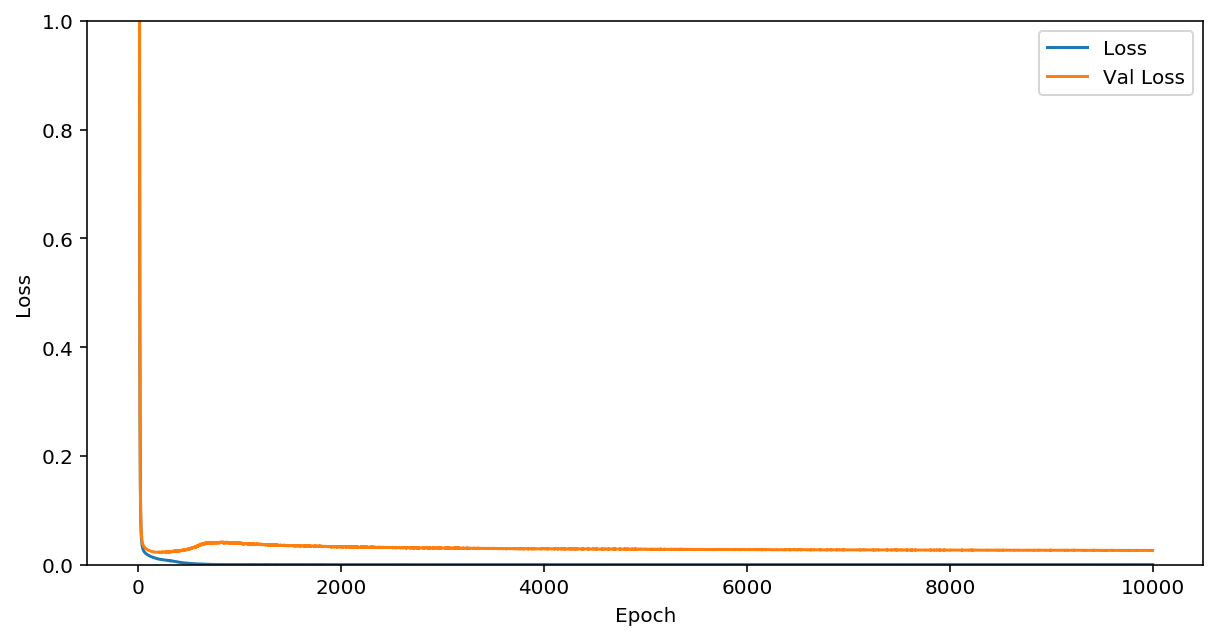

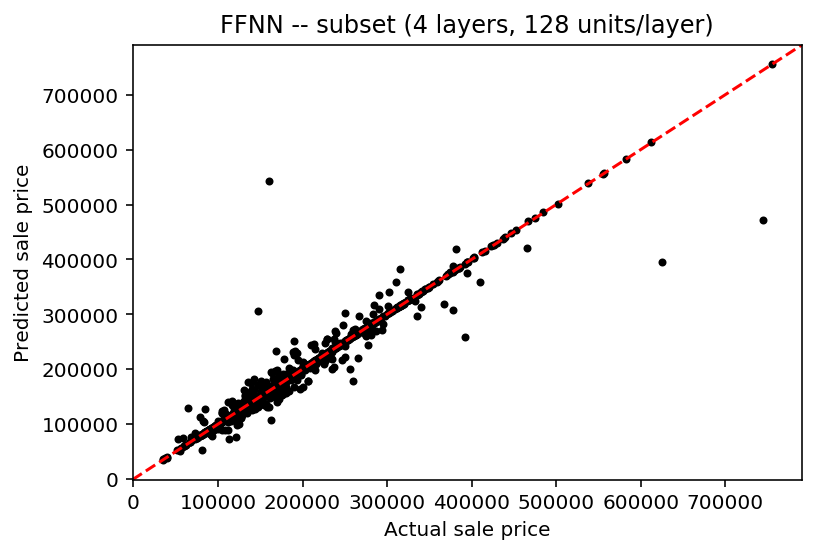

MSE (training data): 0.07224445425812318


In [52]:
# Plot history
housing.plot_history(history)

# Predict all training data
y_train_predict = model.predict(df_train.astype(float).values)

# Plot results
housing.plot_fit(train_sale_price, y_train_predict, 'FFNN -- subset (4 layers, 128 units/layer)')
mse = np.sqrt(metrics.mean_squared_error(np.log(train_sale_price), np.log(y_train_predict)))
print('MSE (training data): {}'.format(mse))

In [184]:
# Predict test data and save
y_test_predict = model.predict(df_test.astype(float).values)
filename_str = 'ffnn_{}_{}_{}'.format(len(n_units), n_units[0], epochs)
df_submission = housing.save_submission(test_id.copy(), y_test_predict, filename_str)

This doesn't do better than the FFNN trained on a subset of features.  Some additional things to try:
* __A deeper network__.  It could be that by adding more layers accuracy could improve.
* __Different activation functions__.  Try a tanh [note -- this is generally not advised].
* __Other strategies__.  Random initializations, gradient clipping, dropout, etc.

## Final model

We can add the following things to the model to attempt to improve performance further:
* __Dropout__.  Randomly dropout units at each layer during training.
* __Regularization__.  Add regularization to keep the weights from growing too large.

In [195]:
# Define model w/ dropout and regularization
def build_model_reg_dropout(n_units, input_shape):
    # Add the first layer with the appropriate input shape
    layers = [tf.keras.layers.Dense(
        n_units[0],
        activation=tf.keras.activations.relu,
        kernel_regularizer=tf.keras.regularizers.l2(0.0001)
        input_shape=(input_shape,)
    )]
    layers.append(tf.keras.layers.Dropout(0.2))
    # Iterate over the remaining layers
    for u in n_units[1:]:
        layers.append(
            tf.keras.layers.Dense(u, 
                activation=tf.keras.activations.relu,
                kernel_regularizer=tf.keras.regularizers.l2(0.0001)
            )
        )
        layers.append(tf.keras.layers.Dropout(0.2))
    # Add the output layer
    layers.append(
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    )
    
    model = keras.Sequential(layers)
    optimizer = keras.optimizers.Adam()
    model.compile(
        loss=tf.losses.MeanSquaredLogarithmicError(),
        optimizer=optimizer,
        metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()]
    )
    
    return model


In [216]:
n_units = [512, 512, 256, 128]
model = build_model(n_units, len(df_train.keys()))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               106496    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 129       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [219]:
# Set tensorboard directory
# Clear any logs from previous runs
log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Shuffle the data
train_x = df_train.astype(float).values
train_y = train_sale_price.values
n_obs = train_x.shape[0]
shuf_inds = np.arange(n_obs)
np.random.shuffle(shuf_inds)
train_x = train_x[shuf_inds, :]
train_y = train_y[shuf_inds]

# Train the model
epochs = 100000
history = model.fit(
  train_x, train_y,
  epochs=epochs, validation_split=0.2, verbose=0,
  callbacks=[PrintDot(), tensorboard_callback])

...100...200...300...400...500...600...700...800...900...1000

...1100...1200...1300...1400...1500...1600...1700...1800...1900...2000

...2100...2200...2300...2400...2500...2600...2700...2800...2900...3000

...3100...3200...3300...3400...3500...3600...3700...3800...3900...4000

...4100...4200...4300...4400...4500...4600...4700...4800...4900...5000

...5100...5200...5300...5400...5500...5600...5700...5800...5900...6000

...6100...6200...6300...6400...6500...6600...6700...6800...6900...7000

...7100...7200...7300...7400...7500...7600...7700...7800...7900...8000

...8100...8200...8300...8400...8500...8600...8700...8800...8900...9000

...9100...9200...9300...9400...9500...9600...9700...9800...9900...10000

...10100...10200...10300...10400...10500...10600...10700...10800...10900...11000

...11100...11200...11300...11400...11500...11600...11700...11800...11900...12000

...12100...12200...12300...12400...12500...12600...12700...12800...12900...13000

...13100...13200...13300...13400...13500..

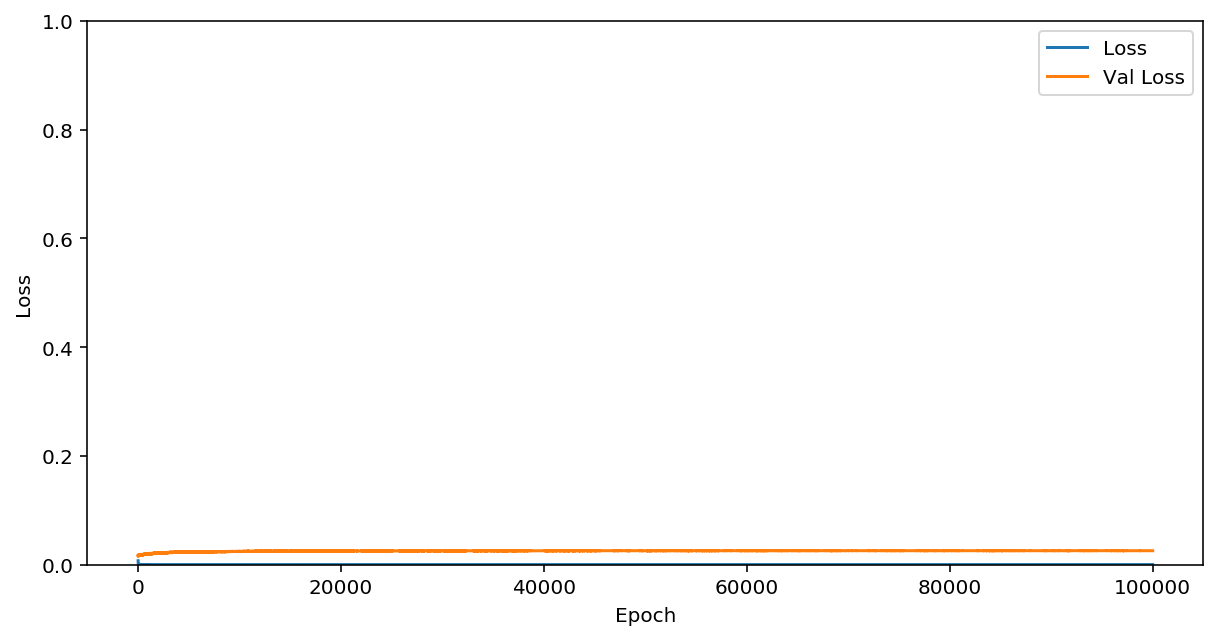

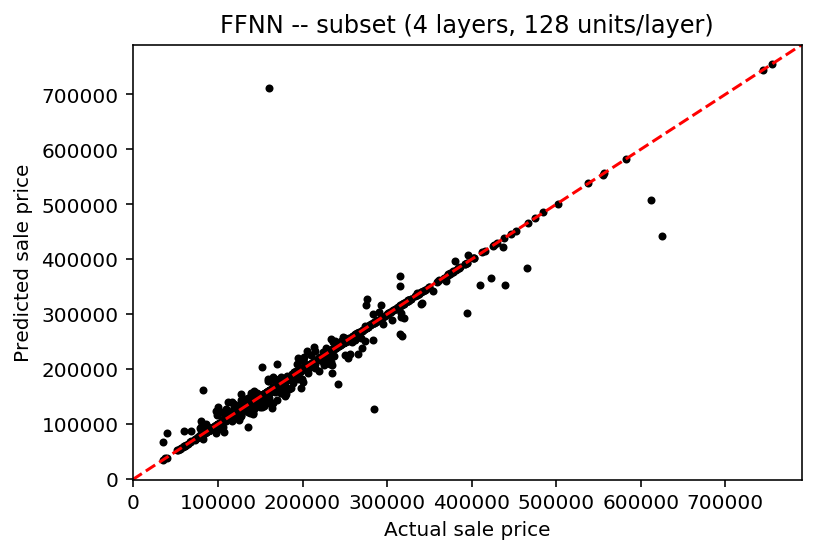

MSE (training data): 0.07145929686286977


In [220]:
# Plot history
housing.plot_history(history)

# Predict all training data
y_train_predict = model.predict(df_train.astype(float).values)

# Plot results
housing.plot_fit(train_sale_price, y_train_predict, 'FFNN -- subset (4 layers, 128 units/layer)')
mse = np.sqrt(metrics.mean_squared_error(np.log(train_sale_price), np.log(y_train_predict)))
print('MSE (training data): {}'.format(mse))

In [221]:
# Predict test data and save
y_test_predict = model.predict(df_test.astype(float).values)
filename_str = 'ffnn_{}_{}_{}'.format(len(n_units), n_units[0], epochs)
df_submission = housing.save_submission(test_id.copy(), y_test_predict, filename_str)

This does a good bit better, acheiving a error of ~0.122 on the test set (currently ~1400/5440 in the rankings).  Certainly room for improvement, but a good stopping point for now.  It appears that the best submissions use stacked models -- weighting the outputs of multiple models -- as well as some additional feature/observation cleaning.

In this case we're suffering from a lack of training data in this case.  This makes outliers particularly influential.  If we wanted to try to improve performance further, we could try things like:
* __Removing outliers__.  Some data points are clearly outliers.  Removing these from the test set might help to improve performance.
* __Model parameter tuning__.  There are a number of things that could be tuned with the current model (e.g., add early stopping, different regularizers, try different learning rates, etc.).  This would require a good amount of time/computational power, and might not be worth the effort at this point.
* __Use the training and test data__.  The test data certainly contains information that can be used.  Even though we don't know the prices of these observations, we can still use this information to constrain the model.  You could imagine some sort of autoencoder scheme where we first train an autoencoder to all of the data, and then use the latent states of the autoencoder to predict sale prices.